<a href="https://colab.research.google.com/github/mehmetalivarol/time-series-analysis-with-lstm/blob/master/VARdeneme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [5]:
#read the data
df=pd.read_excel('/content/drive/My Drive/Colab Data/DO.linkterasend.xlsx',parse_dates=['Date'], index_col='Date')


#check the dtypes
df.dtypes

Units                int64
IsGunuKatsayi      float64
DayOfWeek            int64
WorkDayOfWeek        int64
WorkDayOfMonth2      int64
GeriOdemeDurum      object
dtype: object

In [6]:
df = df.iloc[:,0:5]
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (761, 5)


,Units,IsGunuKatsayi,DayOfWeek,WorkDayOfWeek,WorkDayOfMonth2
Date,,,,,
2017-07-01,1043,0.25,6,0,0
2017-07-02,107,0.05,7,0,0
2017-07-03,3584,1.00,1,1,1
2017-07-04,2994,1.00,2,2,2
2017-07-05,2587,1.00,3,3,3


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


IndexError: ignored

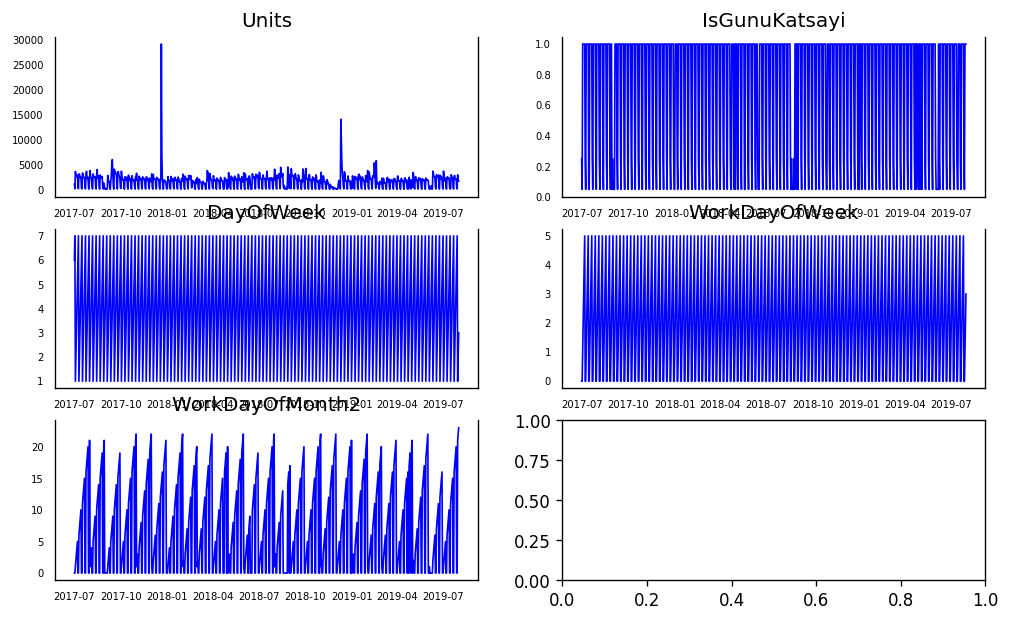

In [7]:
# Plot
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='blue', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [8]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 7
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 9, but rank is 7
  'rank is %d' % (J, J_), ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints d

,Units_x,IsGunuKatsayi_x,DayOfWeek_x,WorkDayOfWeek_x,WorkDayOfMonth2_x
Units_y,1.0000,0.0,0.0,0.0,0.0
IsGunuKatsayi_y,0.0395,1.0,0.0,0.0,0.0
DayOfWeek_y,0.0000,0.0,0.0,0.0,0.0
WorkDayOfWeek_y,0.0000,0.0,0.0,0.0,0.0
WorkDayOfMonth2_y,0.0000,0.0,0.0,0.0,1.0


In [10]:
nobs = 30
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)
print(df_test.shape)  

(731, 5)
(30, 5)


In [0]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f' Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")  

In [12]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

 Augmented Dickey-Fuller Test on "Units" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.7756
 No. Lags Chosen       = 20
 Critical value 1%     = -3.44
 Critical value 5%     = -2.866
 Critical value 10%    = -2.569
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 Augmented Dickey-Fuller Test on "IsGunuKatsayi" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.9183
 No. Lags Chosen       = 20
 Critical value 1%     = -3.44
 Critical value 5%     = -2.866
 Critical value 10%    = -2.569
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


 Augmented Dickey-Fuller Test on "DayOfWeek" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    =

In [13]:
model = VAR(df_train)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  14.912003813000732
BIC :  15.100759067828504
FPE :  2993655.170738224
HQIC:  14.984826982990034 

Lag Order = 2
AIC :  -46.50510669068481
BIC :  -46.15868411831105
FPE :  6.354681056435798e-21
HQIC:  -46.3714457816959 

Lag Order = 3
AIC :  -48.22465088082705
BIC :  -47.72022219421203
FPE :  1.1384543047736078e-21
HQIC:  -48.03001373136547 

Lag Order = 4
AIC :  -103.1075360166134
BIC :  -102.44476121586922
FPE :  1.6634163815793413e-45
HQIC:  -102.85178362179091 

Lag Order = 5
AIC :  -113.68223000398125
BIC :  -112.86076788011455
FPE :  4.251100406037131e-50
HQIC:  -113.36522285299267 

Lag Order = 6
AIC :  -114.05594062838199
BIC :  -113.07544875734409
FPE :  2.9258203204114465e-50
HQIC:  -113.67753870198779 

Lag Order = 7
AIC :  -109.66073711266998
BIC :  -108.52087184936966
FPE :  2.372057587126219e-48
HQIC:  -109.22079988066287 

Lag Order = 8
AIC :  -108.14926983105492
BIC :  -106.84968630333357
FPE :  1.0755569192557198e-47
HQIC:  -107.64765624971062 

Lag

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [14]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,16.48,16.51,1.436e+07,16.49
1,14.94,15.14,3.092e+06,15.02
2,-46.66,-46.31,5.417e-21,-46.53
3,-50.08,-49.57,1.776e-22,-49.89
4,-102.4,-101.8,3.310e-45,-102.2
5,-103.1,-102.3,1.637e-45,-102.8
6,-111.9*,-110.9*,2.497e-49*,-111.5*
7,-108.9,-107.8,4.987e-48,-108.5
8,-109.6,-108.3,2.519e-48,-109.1
9,-105.6,-104.2,1.341e-46,-105.1


In [15]:
model_fitted = model.fit(3)
model_fitted.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/vector_ar/var_model.py:1431: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self._cov_params()))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 22, Oct, 2019
Time:                     07:34:35
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -47.7202
Nobs:                     728.000    HQIC:                  -48.0300
Log likelihood:           12468.8    FPE:                1.13845e-21
AIC:                     -48.2247    Det(Omega_mle):     1.02119e-21
--------------------------------------------------------------------
Results for equation Units
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                    924.904318              NAN              NAN             NAN
L1.Units                   0.296021         0.039286            7.535           0.000
L1.IsGunuKatsayi         120.927636     

In [16]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

Units : 2.04
IsGunuKatsayi : 2.49
DayOfWeek : 1.54
WorkDayOfWeek : 3.33
WorkDayOfMonth2 : 2.18


In [17]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_train.values[-lag_order:]
forecast_input

3


array([[4.380e+02, 2.500e-01, 6.000e+00, 0.000e+00, 0.000e+00],
       [6.300e+01, 5.000e-02, 7.000e+00, 0.000e+00, 0.000e+00],
       [3.678e+03, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]])

In [18]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

,Units_2d,IsGunuKatsayi_2d,DayOfWeek_2d,WorkDayOfWeek_2d,WorkDayOfMonth2_2d
Date,,,,,
2019-07-02,2743.092935,1.008348,2.000000,1.972755,4.343950
2019-07-03,2290.473121,0.987809,3.000000,3.038204,8.250137
2019-07-04,2469.430630,1.110391,3.968214,4.979282,10.765661
2019-07-05,1628.691134,0.735862,5.049869,2.815407,4.914710
2019-07-06,325.971010,0.197993,7.134184,0.892831,-0.338326
2019-07-07,1302.950798,0.487023,4.262278,0.469298,3.520209
2019-07-08,1990.910899,0.768170,2.497924,0.970651,7.213460
2019-07-09,2284.268160,0.898538,2.297861,1.765726,9.079190
2019-07-10,2515.942618,1.079354,2.916116,3.862635,12.025438


In [0]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [20]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results.loc[:, ['Units_2d', 'IsGunuKatsayi_2d', 'DayOfWeek_2d', 'WorkDayOfWeek_2d',
                   'WorkDayOfMonth2_2d']]

,Units_2d,IsGunuKatsayi_2d,DayOfWeek_2d,WorkDayOfWeek_2d,WorkDayOfMonth2_2d
Date,,,,,
2019-07-02,2743.092935,1.008348,2.000000,1.972755,4.343950
2019-07-03,2290.473121,0.987809,3.000000,3.038204,8.250137
2019-07-04,2469.430630,1.110391,3.968214,4.979282,10.765661
2019-07-05,1628.691134,0.735862,5.049869,2.815407,4.914710
2019-07-06,325.971010,0.197993,7.134184,0.892831,-0.338326
2019-07-07,1302.950798,0.487023,4.262278,0.469298,3.520209
2019-07-08,1990.910899,0.768170,2.497924,0.970651,7.213460
2019-07-09,2284.268160,0.898538,2.297861,1.765726,9.079190
2019-07-10,2515.942618,1.079354,2.916116,3.862635,12.025438


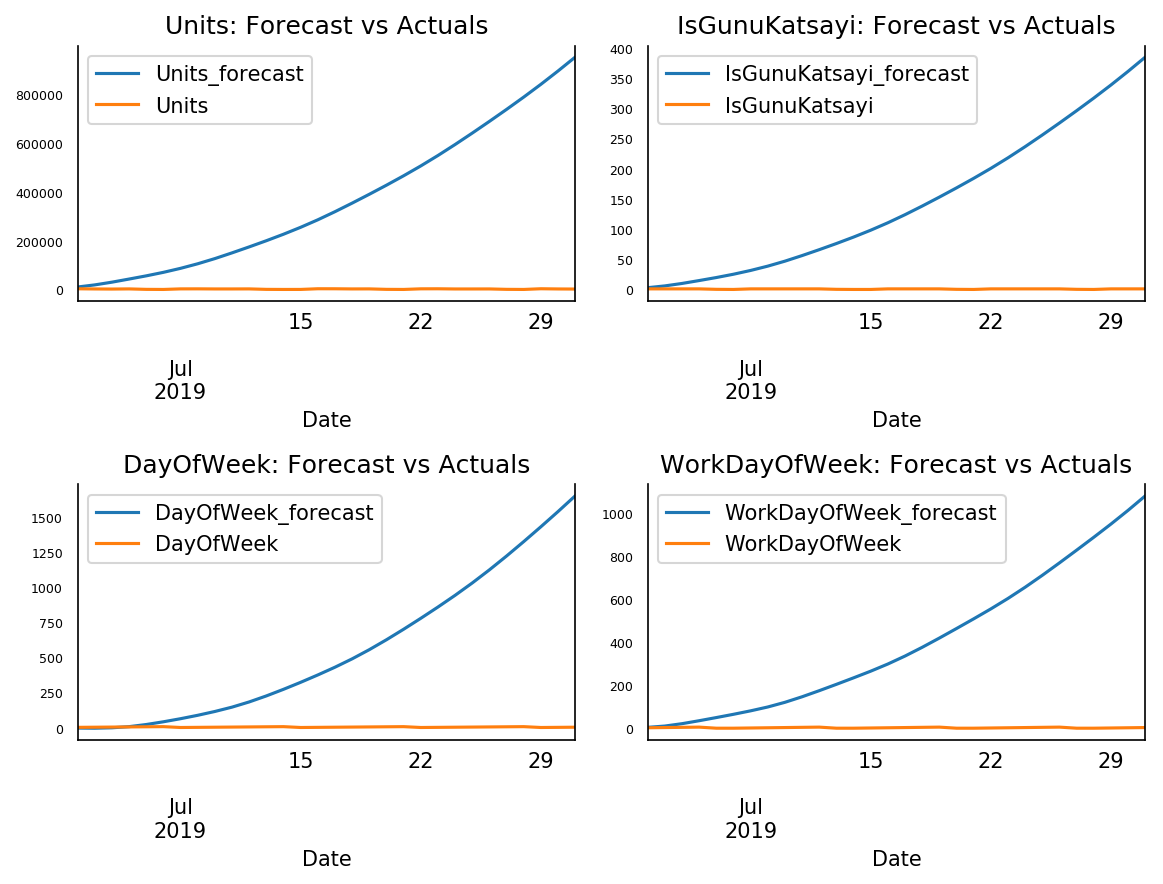

In [21]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(8,6))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [0]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

In [23]:
print('Forecast Accuracy of: Units')
accuracy_prod = forecast_accuracy(df_results['Units_forecast'].values, df_test['Units'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: IsGunuKatsayi')
accuracy_prod = forecast_accuracy(df_results['IsGunuKatsayi_forecast'].values, df_test['IsGunuKatsayi'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: DayOfWeek')
accuracy_prod = forecast_accuracy(df_results['DayOfWeek_forecast'].values, df_test['DayOfWeek'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: WorkDayOfWeek')
accuracy_prod = forecast_accuracy(df_results['WorkDayOfWeek_forecast'].values, df_test['WorkDayOfWeek'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

Forecast Accuracy of: Units
mape :  936.2075
me :  363564.7992
mae :  363564.7992
mpe :  936.2075
rmse :  462671.9345
corr :  -0.0036
minmax :  0.9778

Forecast Accuracy of: IsGunuKatsayi
mape :  649.3733
me :  143.7819
mae :  143.7819
mpe :  649.3733
rmse :  184.9628
corr :  0.0184
minmax :  0.971

Forecast Accuracy of: DayOfWeek
mape :  217.0081
me :  546.7759
mae :  547.9113
mpe :  216.602
rmse :  748.5862
corr :  -0.0627
minmax :  1.0561

Forecast Accuracy of: WorkDayOfWeek
mape :  inf
me :  396.7787
mae :  396.7787
mpe :  inf
rmse :  515.6898
corr :  -0.0822
minmax :  0.956
